In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [7]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1) #minimizes the range from 0-1





In [8]:
model = tf.keras.models.Sequential() # Feed forward model
model.add(tf.keras.layers.Flatten()) # flattens the layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #128 layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #Second hidden layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #Output layer, 10 nodes to account for 0-9 digits


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Loss = Caluclation for error, measuring accuracy

model.fit(x_train, y_train, epochs=3) # Fit the model, 

Epoch 1/3
  20/1875 [..............................] - ETA: 10s - loss: 2.0819 - accuracy: 0.4234

2022-03-31 18:43:11.573652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.2655 - accuracy: 0.9231
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1074 - accuracy: 0.9669
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0728 - accuracy: 0.9771


In [9]:
val_loss, val_acc = model.evaluate(x_test, y_test) 
print(val_loss)
print(val_acc)

 43/313 [===>..........................] - ETA: 1s - loss: 0.1355 - accuracy: 0.9593

2022-03-31 18:43:34.322121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step - loss: 0.0953 - accuracy: 0.9721
0.09529375284910202
0.972100019454956


INFO:tensorflow:Assets written to: epic_num_reader.model/assets


2022-03-31 18:43:58.864014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


0


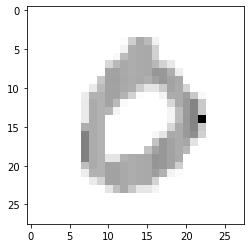

In [13]:
import numpy as np
model.save('epic_num_reader.model') #loads the model
new_model = tf.keras.models.load_model('epic_num_reader.model') #loading new model back


predictions = new_model.predict(x_test)
print(np.argmax(predictions[3]))
plt.imshow(x_test[3],cmap=plt.cm.binary)
plt.show()